In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img = image.load_img("C:/Users/kylev/Desktop/time-series/dataset(pattern_recognition)/training/capital/1.PNG")

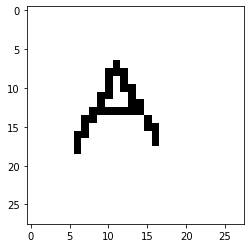

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("C:/Users/kylev/Desktop/time-series/dataset(pattern_recognition)/training/capital/1.PNG")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory('C:/Users/kylev/Desktop/time-series/dataset(pattern_recognition)/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('C:/Users/kylev/Desktop/time-series/dataset(pattern_recognition)/test/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 30 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [7]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])

In [8]:
model.compile(loss = 'binary_crossentropy',
             optimizer =  RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [9]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
3/3 [==============================] - 2s 424ms/step - loss: 11.7722 - accuracy: 0.3333
Epoch 2/20
3/3 [==============================] - 1s 421ms/step - loss: 0.9079 - accuracy: 0.5556
Epoch 3/20
3/3 [==============================] - 1s 442ms/step - loss: 0.8493 - accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 1s 402ms/step - loss: 0.8448 - accuracy: 0.7778
Epoch 5/20
3/3 [==============================] - 1s 392ms/step - loss: 0.3278 - accuracy: 0.8889
Epoch 6/20
3/3 [==============================] - 1s 412ms/step - loss: 0.0489 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 1s 369ms/step - loss: 0.0356 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 1s 363ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 1s 374ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 1s 375ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 11/20
3/3 [=

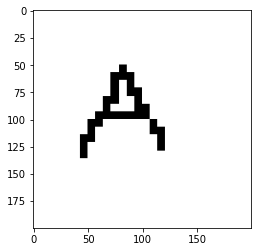

This is probably a uppercase A.


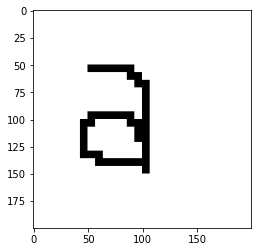

This is probably an lowercase a.


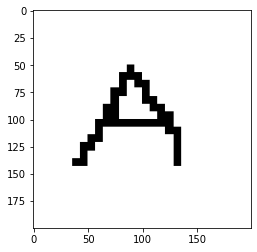

This is probably a uppercase A.


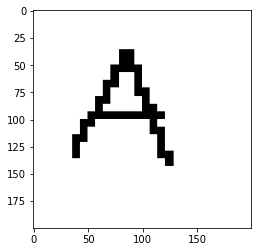

This is probably a uppercase A.


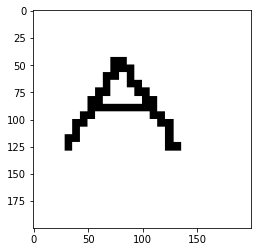

This is probably a uppercase A.


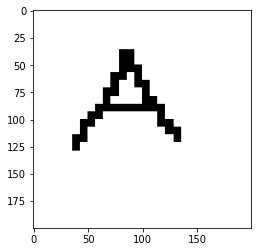

This is probably a uppercase A.


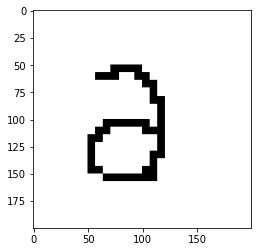

This is probably an lowercase a.


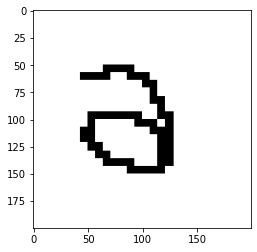

This is probably an lowercase a.


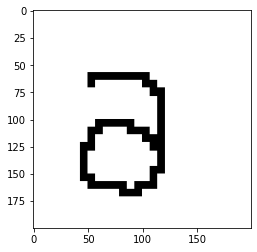

This is probably an lowercase a.


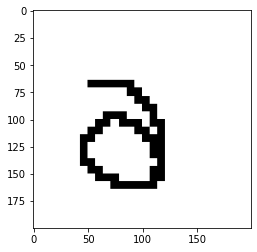

This is probably an lowercase a.


In [10]:
dir_path = 'C:/Users/kylev/Desktop/time-series/dataset(pattern_recognition)/test'

for i in os.listdir(dir_path ):
    img = image.load_img(dir_path + '//' + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("This is probably a uppercase A.")
    else:
        print("This is probably an lowercase a.")